In [98]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# Normalize pixel values
train_x = train_x / 255.0
test_x = test_x / 255.0


print(train_images.shape)
print(test_images.shape)


(50000, 28, 28)
(10000, 28, 28)


In [103]:
sgd = keras.optimizers.SGD(learning_rate=0.001)
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
adagrad = keras.optimizers.Adagrad(learning_rate=0.001)
# model.compile(optimizer=sgd, ...)

act0 = 'softmax'
act1 = 'relu'
act2 = 'tanh'


# Compile the model with multi-class precision as the evaluation metric
k = 1
precision = tf.keras.metrics.Precision(top_k=k)

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=act1),
    keras.layers.Dense(512, activation=act1),
    keras.layers.Dense(10, activation=act0)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[precision])

In [101]:
# Train the model
history = model.fit(train_images, train_labels, batch_size=25000, epochs=30, validation_split=0.2, shuffle=True)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/30


ValueError: in user code:

    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\engine\training.py", line 1028, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\engine\training.py", line 1122, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\metrics\metrics.py", line 906, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "C:\Users\Musfer\.virtualenvs\goit_3-gDpVBzuu\lib\site-packages\keras\utils\metrics_utils.py", line 674, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (None, 10) and (None, 1) are incompatible


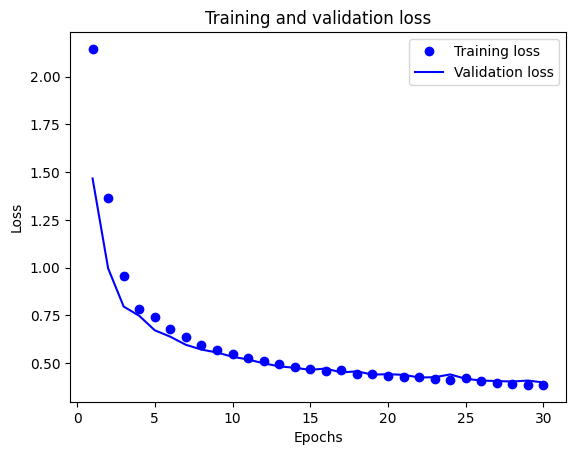

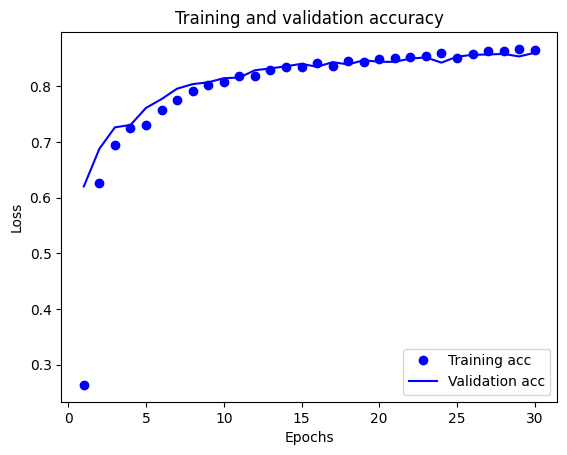

In [93]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()